In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.sparse import csr_matrix
from sklearn.cluster import DBSCAN
import networkx as nx

from utils import Cluster, HitsContainer, make_colour_list

In [2]:
hits_file_name = "example_hit_data.npy"
slice_file_name = "example_slice_data.npz"
data = np.load(hits_file_name)
slice_data = np.load(slice_file_name)

In [3]:
hits = HitsContainer(data)

Firstly, make hit clusters using DBSCAN clustering algorithm

In [4]:
# Define clustering parameters
eps = 3
min_samples = 10

In [5]:
hits.make_clusters(eps,min_samples)

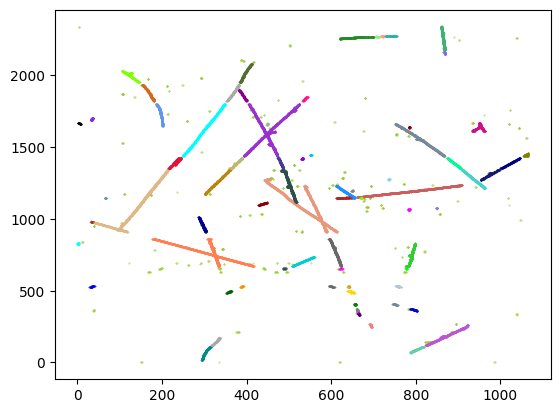

In [ ]:
# Plot clusters
colour_list = make_colour_list(0.8)
hits.plot_clusters(colour_list)

Now, plot slices made using Pandora to compare to clusters made above

In [7]:
# Create list of colours for each hit according to the slice it belongs to
slice_colors = []
for slice_id in slice_data["slice_ids"]:
    slice_colors.append(colour_list[int(slice_id)])

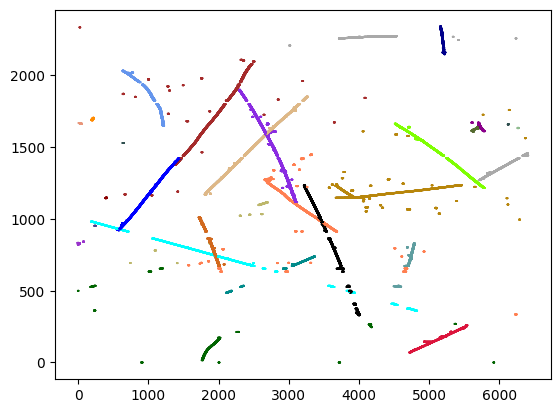

In [15]:
plt.scatter( slice_data["y_coords"], slice_data["x_coords"], s=0.1, c=slice_colors)
plt.show()

Some clusters need to be associated together like in the slice data. Need to find the cluster endpoints to calculate the distance between different clusters

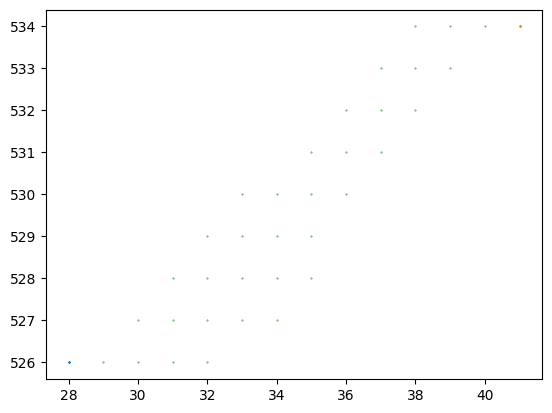

In [20]:
# Pick a random cluster to show endpoints (in orange and blue)
cluster = hits.clusters_dictionary[2]
cluster.plot_cluster("green", show_endpoints=True)